# This is Environmental Sensor Telemetry Data Dataset in which we are predicting the wheather there is a person or not of the Online using Logistic Regression



# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# 2) Loading of dataset into Pandas DataFrame

In [2]:
data = pd.read_csv('iot_telemetry_data.csv')

In [3]:
data.head(15)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.004391,77.900002,True,0.007009,False,0.018589,27.000000
6,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
7,1.594512e+09,00:0f:00:70:91:0a,0.002938,76.000000,False,0.005241,False,0.013628,19.700001
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.004345,77.900002,True,0.006957,False,0.018440,27.000000
9,1.594512e+09,b8:27:eb:bf:9d:51,0.004970,50.900000,False,0.007667,False,0.020457,22.600000


In [4]:
data['device'].unique()

array(['b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d'],
      dtype=object)

# 3) Preprocessing of Training data

In [5]:
labelencoder = LabelEncoder()
devices = labelencoder.fit_transform(data['device'])
lights = labelencoder.fit_transform(data['light'])
devices

array([2, 0, 2, ..., 1, 0, 2])

In [6]:
onehotencoder = OneHotEncoder()

In [7]:
data['device'] = devices
data['light'] = lights

In [8]:
data.drop(['ts','motion'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   device    405184 non-null  int32  
 1   co        405184 non-null  float64
 2   humidity  405184 non-null  float64
 3   light     405184 non-null  int64  
 4   lpg       405184 non-null  float64
 5   smoke     405184 non-null  float64
 6   temp      405184 non-null  float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 20.1 MB


# 5) Data Visualization using Seaborn

<AxesSubplot:xlabel='co', ylabel='humidity'>

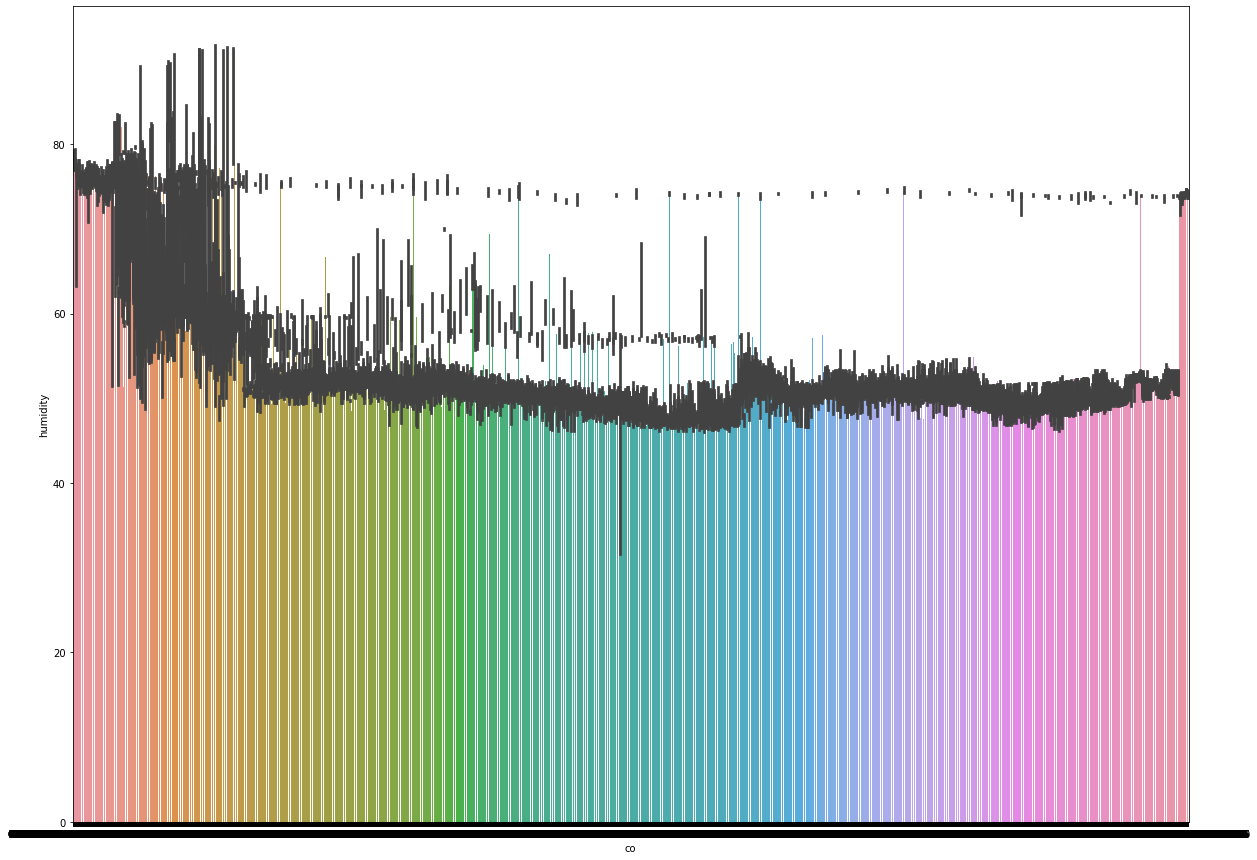

In [10]:
plt.figure(figsize=(20,15))
sns.barplot( 'co','humidity', data= data)

<AxesSubplot:xlabel='temp', ylabel='count'>

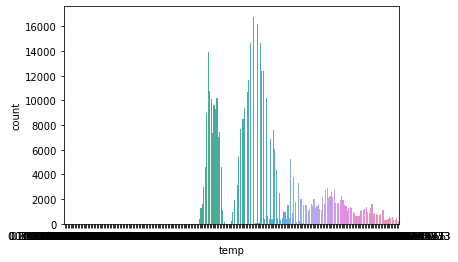

In [11]:
sns.countplot('temp',data=data)

Text(0.5, 1.0, 'Ratio of temprature and smaoke')

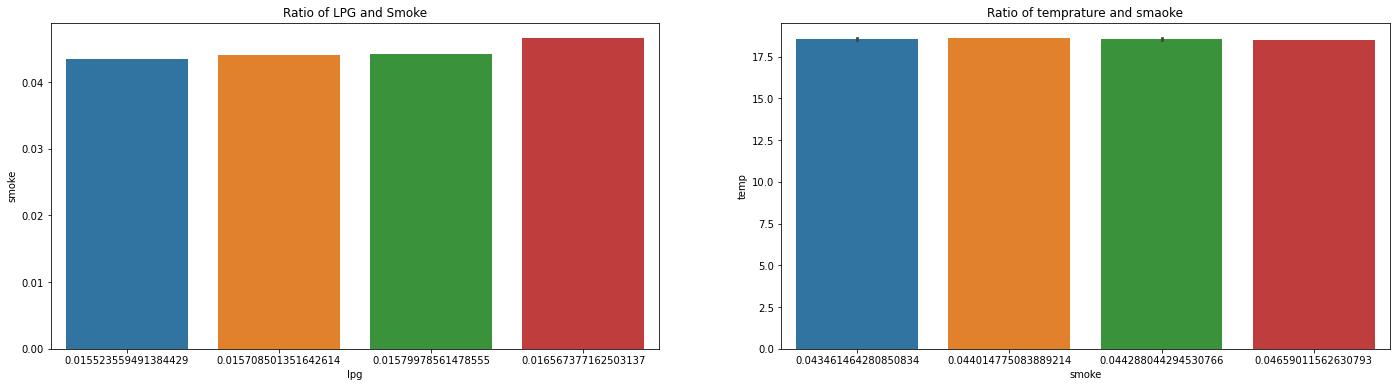

In [12]:
fig, ax =plt.subplots(1,2,figsize=(24, 6))
sns.barplot('lpg','smoke',ax=ax[0],data=data.sort_values(by='lpg',ascending=False).head(10)).set_title('Ratio of LPG and Smoke')
sns.barplot('smoke','temp',ax=ax[1],data=data.sort_values(by='smoke',ascending=False).head(10)).set_title('Ratio of temprature and smaoke')

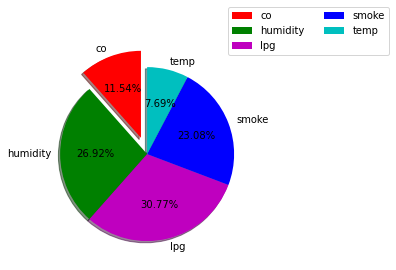

In [13]:
activities=['co','humidity','lpg','smoke','temp']
slice=[3,7,8,6,2]
color=['r', 'g', 'm', 'b','c']
plt.pie(slice, labels=activities, colors=color, startangle=90,shadow=True, 
       explode=(0.2,0,0,0,0),autopct='%1.2f%%')
plt.legend(bbox_to_anchor =(0.85, 1.20), ncol = 2)
plt.show()

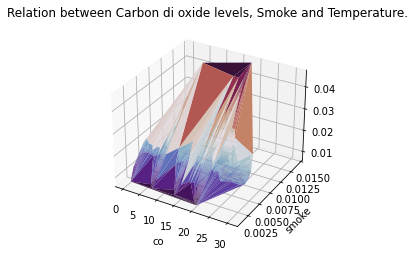

In [33]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data['temp'], data['co'], data['smoke'], cmap = plt.cm.twilight_shifted)
plt.title('Relation between Carbon di oxide levels, Smoke and Temperature.')
plt.xlabel('co')
plt.ylabel('smoke')
plt.show()

In [17]:
data.head(12)

,device,co,humidity,light,lpg,smoke,temp
0,2,0.004956,51.000000,0,0.007651,0.020411,22.700000
1,0,0.002840,76.000000,0,0.005114,0.013275,19.700001
2,2,0.004976,50.900000,0,0.007673,0.020475,22.600000
3,1,0.004403,76.800003,1,0.007023,0.018628,27.000000
4,2,0.004967,50.900000,0,0.007664,0.020448,22.600000
5,1,0.004391,77.900002,1,0.007009,0.018589,27.000000
6,2,0.004976,50.900000,0,0.007673,0.020475,22.600000
7,0,0.002938,76.000000,0,0.005241,0.013628,19.700001
8,1,0.004345,77.900002,1,0.006957,0.018440,27.000000
9,2,0.004970,50.900000,0,0.007667,0.020457,22.600000


# 6) Model Defining using Logistic Regression

In [18]:
logi = LogisticRegression()

In [19]:
X = data.drop(['light'],axis=1)
y = data[['light']].values

In [20]:
X

,device,co,humidity,lpg,smoke,temp
0,2,0.004956,51.000000,0.007651,0.020411,22.700000
1,0,0.002840,76.000000,0.005114,0.013275,19.700001
2,2,0.004976,50.900000,0.007673,0.020475,22.600000
3,1,0.004403,76.800003,0.007023,0.018628,27.000000
4,2,0.004967,50.900000,0.007664,0.020448,22.600000
...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0.006247,0.016437,19.200001
405180,2,0.005882,48.500000,0.008660,0.023301,22.200000
405181,1,0.004540,75.699997,0.007181,0.019076,26.600000
405182,0,0.003745,75.300003,0.006247,0.016437,19.200001


In [21]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

# 7) Spliting data into input and label/output/target

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=14)

In [23]:
X_train

,device,co,humidity,lpg,smoke,temp
29294,1,0.003958,70.000000,0.006502,0.017155,25.400000
159213,1,0.004245,53.099998,0.006840,0.018110,26.700001
70724,2,0.005126,51.600000,0.007840,0.020950,21.400000
102113,0,0.004065,74.699997,0.006629,0.017515,19.299999
277167,2,0.005884,53.300000,0.008662,0.023307,22.200000
...,...,...,...,...,...,...
284999,0,0.001505,77.800003,0.003231,0.008129,19.299999
117142,1,0.004713,59.299999,0.007378,0.019635,23.299999
402700,0,0.003700,75.500000,0.006193,0.016285,19.200001
79192,0,0.003848,74.800003,0.006371,0.016786,19.400000


In [24]:
y_train

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [25]:
X_test

,device,co,humidity,lpg,smoke,temp
326254,0,0.003049,78.099998,0.005384,0.014023,20.100000
372784,2,0.005733,48.500000,0.008501,0.022842,21.700000
242185,1,0.003670,62.799999,0.006157,0.016184,26.299999
219185,1,0.003914,55.700001,0.006450,0.017008,25.400000
369035,1,0.004334,57.099998,0.006943,0.018401,27.000000
...,...,...,...,...,...,...
200477,0,0.008437,73.400002,0.011243,0.030792,18.600000
315907,0,0.003465,76.000000,0.005906,0.015481,19.600000
299622,2,0.006519,48.900000,0.009329,0.025227,22.300000
218690,2,0.006609,48.400000,0.009422,0.025495,22.500000


In [26]:
y_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [27]:
Rudy=logi.fit(X_train,y_train) 

C:\Program Files\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# 8) Final Prediction of Model

In [28]:
predict=logi.predict(X_test)

In [29]:
predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [30]:
score = accuracy_score(y_test, predict)

score

0.9831188222663721

Text(0.5, 15.0, 'Predicted label')

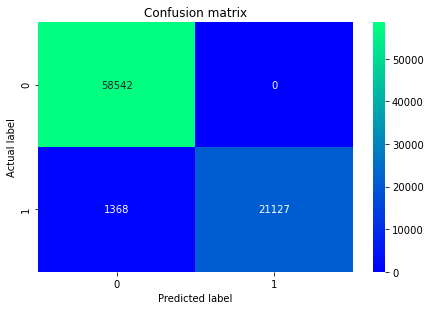

In [31]:
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, cmap="winter" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')